🧠 Atelier 1 – Analyse de Sentiments sur les Commentaires YouTube

Module : NLP

1️⃣ Importer les bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2️⃣ Charger le fichier Excel

In [2]:
df = pd.read_excel("bbc-text.xlsx")
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


3️⃣ Exploration du corpus

In [9]:
print("Dimensions du dataset :", corpus.shape)
print("Colonnes disponibles :", corpus.columns.tolist())


Dimensions du dataset : (2225, 2)
Colonnes disponibles : ['category', 'text']


4️⃣ Exemple de commentaire et de sa classe

In [4]:
corpus.iloc[0]

category                                                 tech
text        tv future in the hands of viewers with home th...
Name: 0, dtype: object

5️⃣ Vérifier l’équilibrage des classes

In [10]:
corpus['category'].value_counts()


category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

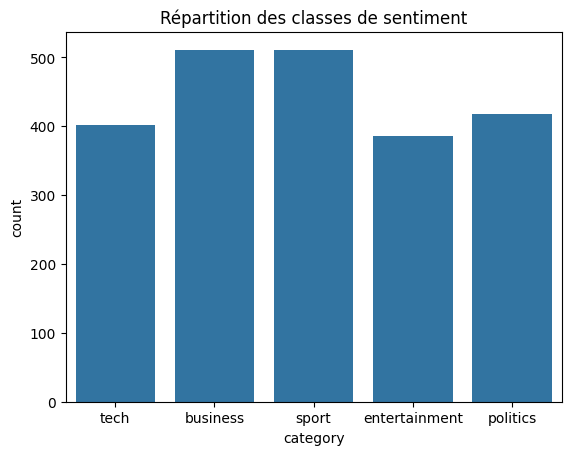

In [11]:
sns.countplot(x='category', data=corpus)
plt.title("Répartition des classes de sentiment")
plt.show()


6️⃣ Séparation des données (train / test)

In [12]:
X = corpus['text']
y = corpus['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


7️⃣ Vectorisation avec CountVectorizer

In [13]:
count_vectorizer = CountVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


8️⃣ Création et entraînement du modèle Random Forest

In [14]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train_count, y_train)


RandomForestClassifier(random_state=42)

9️⃣ Évaluation sur les données d’apprentissage

In [15]:
y_train_pred = rf.predict(X_train_count)
print("Accuracy (Train) :", accuracy_score(y_train, y_train_pred))


Accuracy (Train) : 1.0


🔟 Évaluation sur les données de test

In [16]:
y_test_pred = rf.predict(X_test_count)

print("Accuracy (Test) :", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Accuracy (Test) : 0.9707865168539326
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       102
entertainment       0.99      1.00      0.99        77
     politics       0.96      0.93      0.95        84
        sport       0.98      1.00      0.99       102
         tech       0.97      0.96      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



1️⃣1️⃣ Modèle Arbre de Décision

In [17]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_count, y_train)


DecisionTreeClassifier(random_state=42)

1️⃣2️⃣ Évaluation de l’Arbre de Décision

In [18]:
y_dt_pred = dt.predict(X_test_count)

print("Accuracy (Decision Tree) :", accuracy_score(y_test, y_dt_pred))
print(classification_report(y_test, y_dt_pred))


Accuracy (Decision Tree) : 0.8629213483146068
               precision    recall  f1-score   support

     business       0.85      0.81      0.83       102
entertainment       0.80      0.87      0.83        77
     politics       0.84      0.80      0.82        84
        sport       0.93      0.97      0.95       102
         tech       0.88      0.85      0.87        80

     accuracy                           0.86       445
    macro avg       0.86      0.86      0.86       445
 weighted avg       0.86      0.86      0.86       445



1️⃣3️⃣ Comparaison Random Forest vs Arbre de Décision

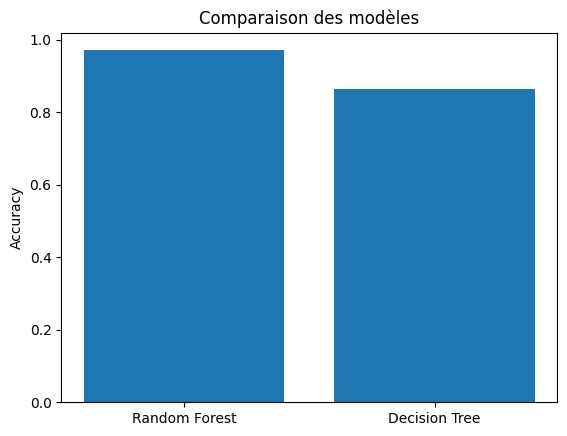

In [19]:
models = ['Random Forest', 'Decision Tree']
scores = [
    accuracy_score(y_test, y_test_pred),
    accuracy_score(y_test, y_dt_pred)
]

plt.bar(models, scores)
plt.ylabel("Accuracy")
plt.title("Comparaison des modèles")
plt.show()


1️⃣4️⃣ Vectorisation avec TF-IDF

In [20]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


1️⃣5️⃣ Entraînement Random Forest avec TF-IDF

In [21]:
rf_tfidf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_tfidf.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

1️⃣6️⃣ Évaluation avec TF-IDF

In [22]:
y_tfidf_pred = rf_tfidf.predict(X_test_tfidf)

print("Accuracy TF-IDF :", accuracy_score(y_test, y_tfidf_pred))
print(classification_report(y_test, y_tfidf_pred))


Accuracy TF-IDF : 0.9707865168539326
               precision    recall  f1-score   support

     business       0.95      0.95      0.95       102
entertainment       0.99      1.00      0.99        77
     politics       0.95      0.94      0.95        84
        sport       0.98      1.00      0.99       102
         tech       0.99      0.96      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



1️⃣7️⃣ TF-IDF avec (1,2)-grammes

In [23]:
tfidf_ngram = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    max_features=7000
)

X_train_ng = tfidf_ngram.fit_transform(X_train)
X_test_ng = tfidf_ngram.transform(X_test)

rf_ng = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_ng.fit(X_train_ng, y_train)
y_ng_pred = rf_ng.predict(X_test_ng)

print("Accuracy TF-IDF (1,2)-grammes :", accuracy_score(y_test, y_ng_pred))


Accuracy TF-IDF (1,2)-grammes : 0.9730337078651685


1️⃣8️⃣ Validation croisée

In [24]:
rf_scores = cross_val_score(rf, X_train_count, y_train, cv=5)
dt_scores = cross_val_score(dt, X_train_count, y_train, cv=5)

print("Random Forest - CV Mean :", rf_scores.mean())
print("Decision Tree - CV Mean :", dt_scores.mean())


Random Forest - CV Mean : 0.954494382022472
Decision Tree - CV Mean : 0.8106741573033709
